<a href="https://colab.research.google.com/github/vijaytamilselvan/neural-net-from-scratch/blob/main/trigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()
words=open('names.txt','r').read().splitlines()
words[:5]

Saving names.txt to names.txt


['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
len(words)

32033

In [4]:
#Pre-equisites to have the index and corresponding character

chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [9]:
#building the context of length 3 and then predicting the next character based on training

block_size=3

X,Y=[], []

for w in words[:5]:
  context=[0]*block_size#context refers to number of characters it takes to predict the next one
  context
  for ch in w+'.':
    ix=stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context=context[1:]+[ix]#cropping and appending next character into context

X=torch.tensor(X)
Y=torch.tensor(Y)

Y

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [5]:
import torch
block_size=3
X,Y=[],[]
for w in words:
  context=[0]*block_size
  for ch in w+'.':
    ix=stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context=context[1:]+[ix]

X=torch.tensor(X)
Y=torch.tensor(Y)

In [7]:
X.shape,X.dtype,Y.shape,Y.dtype

#Now, we have the input and expected output. Next, we need to embed the inpouts before we pass it to neural network.

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [29]:
F.one_hot(torch.tensor(6),num_classes=27).float()@C

tensor([ 2.8132, -0.3298])

In [6]:
emb=C[X]
emb.shape

NameError: name 'C' is not defined

In [9]:
W=torch.randn((6,100))
b=torch.randn(100)

In [16]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([16, 6])

In [33]:
emb.shape

torch.Size([32, 3, 2])

In [60]:
emb.view(5,6)==torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1)
#concat operation produc es the similar results as that of the view function. In fat, concat produces whole new set of tensor whereas view just changes the view of the orginal tensor and keep the tensor shape as original without modifying.

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]])

In [11]:
h=torch.tanh(emb.view(-1,6) @ W+b)
h.shape

NameError: name 'emb' is not defined

In [35]:
W2=torch.randn((100,27))
b2=torch.randn(27)

In [10]:
logits=h@W2 + b2
logits.shape

NameError: name 'h' is not defined

In [9]:
counts=logits.exp()
prob=counts/counts.sum(1,keepdims=True)
loss=-prob[torch.arange(5),Y].log().mean()
loss

#Instead of creating all these intermediate tensor, it is computationally efficient to go for the cross_entropy loss calculation instead of the manual method.

NameError: name 'logits' is not defined

In [19]:
def build_dataset(words):

    block_size=3
    X,Y=[],[]
    for w in words:
      context=[0]*block_size
      for ch in w+'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context=context[1:]+[ix]

    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,Ytr=build_dataset(words[:n1])
Xdev,Ydev=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])

torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])


In [8]:
loss=F.cross_entropy(logits,Y)
loss

NameError: name 'logits' is not defined

In [16]:
logits=h@W2 + b2
logits.shape
logits

tensor([[ -9.1009,  -1.9420,  11.5898,  ...,  -6.5989,  -9.7184,  -3.7417],
        [  1.4162,   6.5654,  -1.3796,  ...,   0.6034,   2.5797,  -2.4394],
        [ -6.5773,   3.2364,  -5.6190,  ..., -25.4841,   1.0645,  10.9395],
        ...,
        [  0.1005,   3.8950, -10.8933,  ...,   2.5856,  10.7380,   1.1317],
        [  2.4111,   3.5541,  -0.4925,  ..., -13.7040,  -4.9867,   9.6189],
        [-14.2483,  -8.0516, -10.5223,  ...,   3.9771,  -3.8967,  -1.2648]],
       grad_fn=<AddBackward0>)

In [17]:
counts=logits.exp()
counts
prob=counts/counts.sum(1,keepdims=True)
prob.shape

torch.Size([228146, 27])

In [25]:
prob[torch.arange(228146),Y]

tensor([2.7595e-02, 3.4141e-08, 2.0262e-08,  ..., 3.5150e-10, 6.3253e-05,
        9.8732e-01], grad_fn=<IndexBackward0>)

In [18]:
loss=-prob[torch.arange(228146),Y].log().mean()
loss

tensor(18.7424, grad_fn=<NegBackward0>)

In [19]:
F.cross_entropy(logits,Y)# Efficient way of finding the loss instead of finding the counts, and then the logits and then the prob, loss.
#Forward and backward pass becomes much more efficient when we go for cross-entropy
#Also, finding exp and then finding prob is computationally expensive and mathematically non well behaved as too much postive number will be exp to infinity which gives the wrong prob

tensor(18.7424, grad_fn=<NllLossBackward0>)

In [71]:
for p in parameters:
    p.requires_grad=True

In [133]:
#Optimization technique to find out the learning rate the produces the good result. Here from the plot between lri and losses, we can identify the loss become much less when it is around -0.1
lre=torch.linspace(-3,0,1000)
lrs=10**lre

In [42]:
C = torch.randn((27, 10), requires_grad=True)       # embedding table
W = torch.randn((30, 200), requires_grad=True)       # hidden layer
b = torch.randn(200, requires_grad=True)
W2 = torch.randn((200, 27), requires_grad=True)     # output layer
b2 = torch.randn(27, requires_grad=True)

parameters = [C, W, b, W2, b2]
sum(p.nelement() for p in parameters)

11897

In [ ]:
lri=[]
lossi=[]
stepi=[]

In [56]:
lri=[]
lossi=[]
stepi=[]

for i in range(50000):
  #forward-pass

  ix=torch.randint(0,Xtr.shape[0],(32,)) #mini-batch sampling, which takes only sample of data from the entire input

  emb=C[Xtr[ix]]
  h=torch.tanh(emb.view(-1,30) @ W+b)
  h.shape
  logits=h@W2 + b2
  logits.shape
  loss=F.cross_entropy(logits,Ytr[ix])
  #print(loss.item())

  for p in parameters:
    p.grad= None

  loss.backward()

  #lr=lrs[i]


  for p in parameters:
    if p.grad is not None:
        p.data += -0.05 * p.grad


  #lri.append(lre[i])
  stepi.append(i)

  lossi.append(loss.item())

print(loss.item())


2.014366865158081


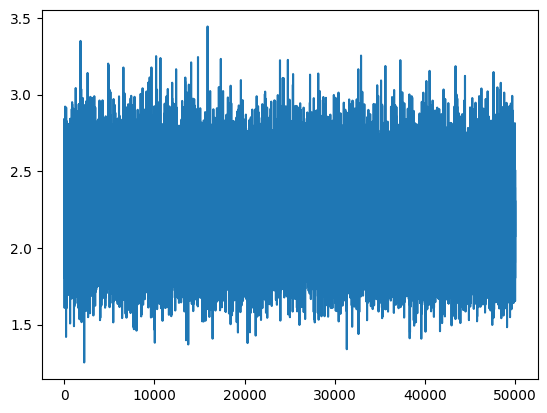

In [53]:
plt.plot(stepi,lossi)

In [57]:
emb=C[Xtr]
h=torch.tanh(emb.view(-1,30) @ W+b)
h.shape
logits=h@W2 + b2
logits.shape
loss=F.cross_entropy(logits,Ytr)
loss

tensor(2.1095, grad_fn=<NllLossBackward0>)

In [58]:
emb=C[Xdev]
h=torch.tanh(emb.view(-1,30) @ W+b)
h.shape
logits=h@W2 + b2
logits.shape
loss=F.cross_entropy(logits,Ydev)
loss

tensor(2.1788, grad_fn=<NllLossBackward0>)

In [29]:
torch.randint(0,5,(32,))

tensor([3, 2, 2, 0, 2, 1, 0, 2, 2, 4, 2, 2, 1, 1, 4, 1, 3, 1, 2, 4, 4, 2, 3, 4,
        0, 1, 1, 3, 2, 2, 1, 0])

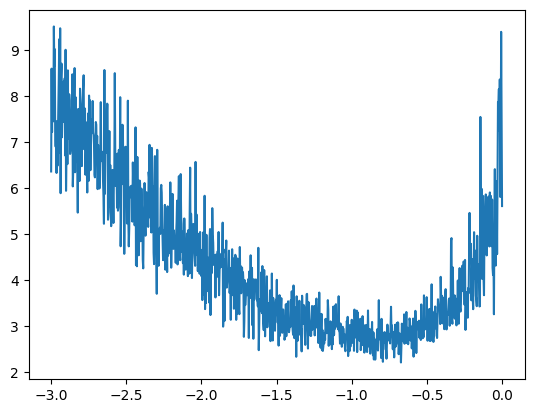

In [137]:
plt.plot(lri,lossi)

In [ ]:
plt.

In [ ]:
#Optimization
#1. Changing the number of neurons in the intermediate layer to make the learning with more number of parameters which prevents the model from overfitting as the smaller model can easily starts memorizing the data instead of training.
#2. Changing the learning rate
#3. Canging the embedding layer
#4. How many iterations we keep the model running.
#5. Changing the batch size